In [165]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Lade das Datenset
charging_set = pd.read_csv("data/cleaned_charging_set.csv")
charging_set.head(3)



,id,kWhDelivered,siteID,spaceID,stationID,timezone,userID,connectionTime_date,connectionTime_time,disconnectTime_date,...,paymentRequired,requestedDeparture,UserID,WhPerMile_present,kWhRequested_present,milesRequested_present,minutesAvailable_present,modifiedAt_present,paymentRequired_present,requestedDeparture_present
0,5e23b149f9af8b5fe4b973cf,25.016,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,2020-01-02,13:08:54,2020-01-02,...,True,"Thu, 02 Jan 2020 20:51:54 GMT",1,1,1,1,1,1,1,1
1,5e23b149f9af8b5fe4b973d0,33.097,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,2020-01-02,13:36:50,2020-01-02,...,True,"Thu, 02 Jan 2020 23:31:50 GMT",1,1,1,1,1,1,1,1
2,5e23b149f9af8b5fe4b973d1,6.521,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,2020-01-02,13:56:35,2020-01-03,...,True,"Thu, 02 Jan 2020 14:56:35 GMT",1,1,1,1,1,1,1,1


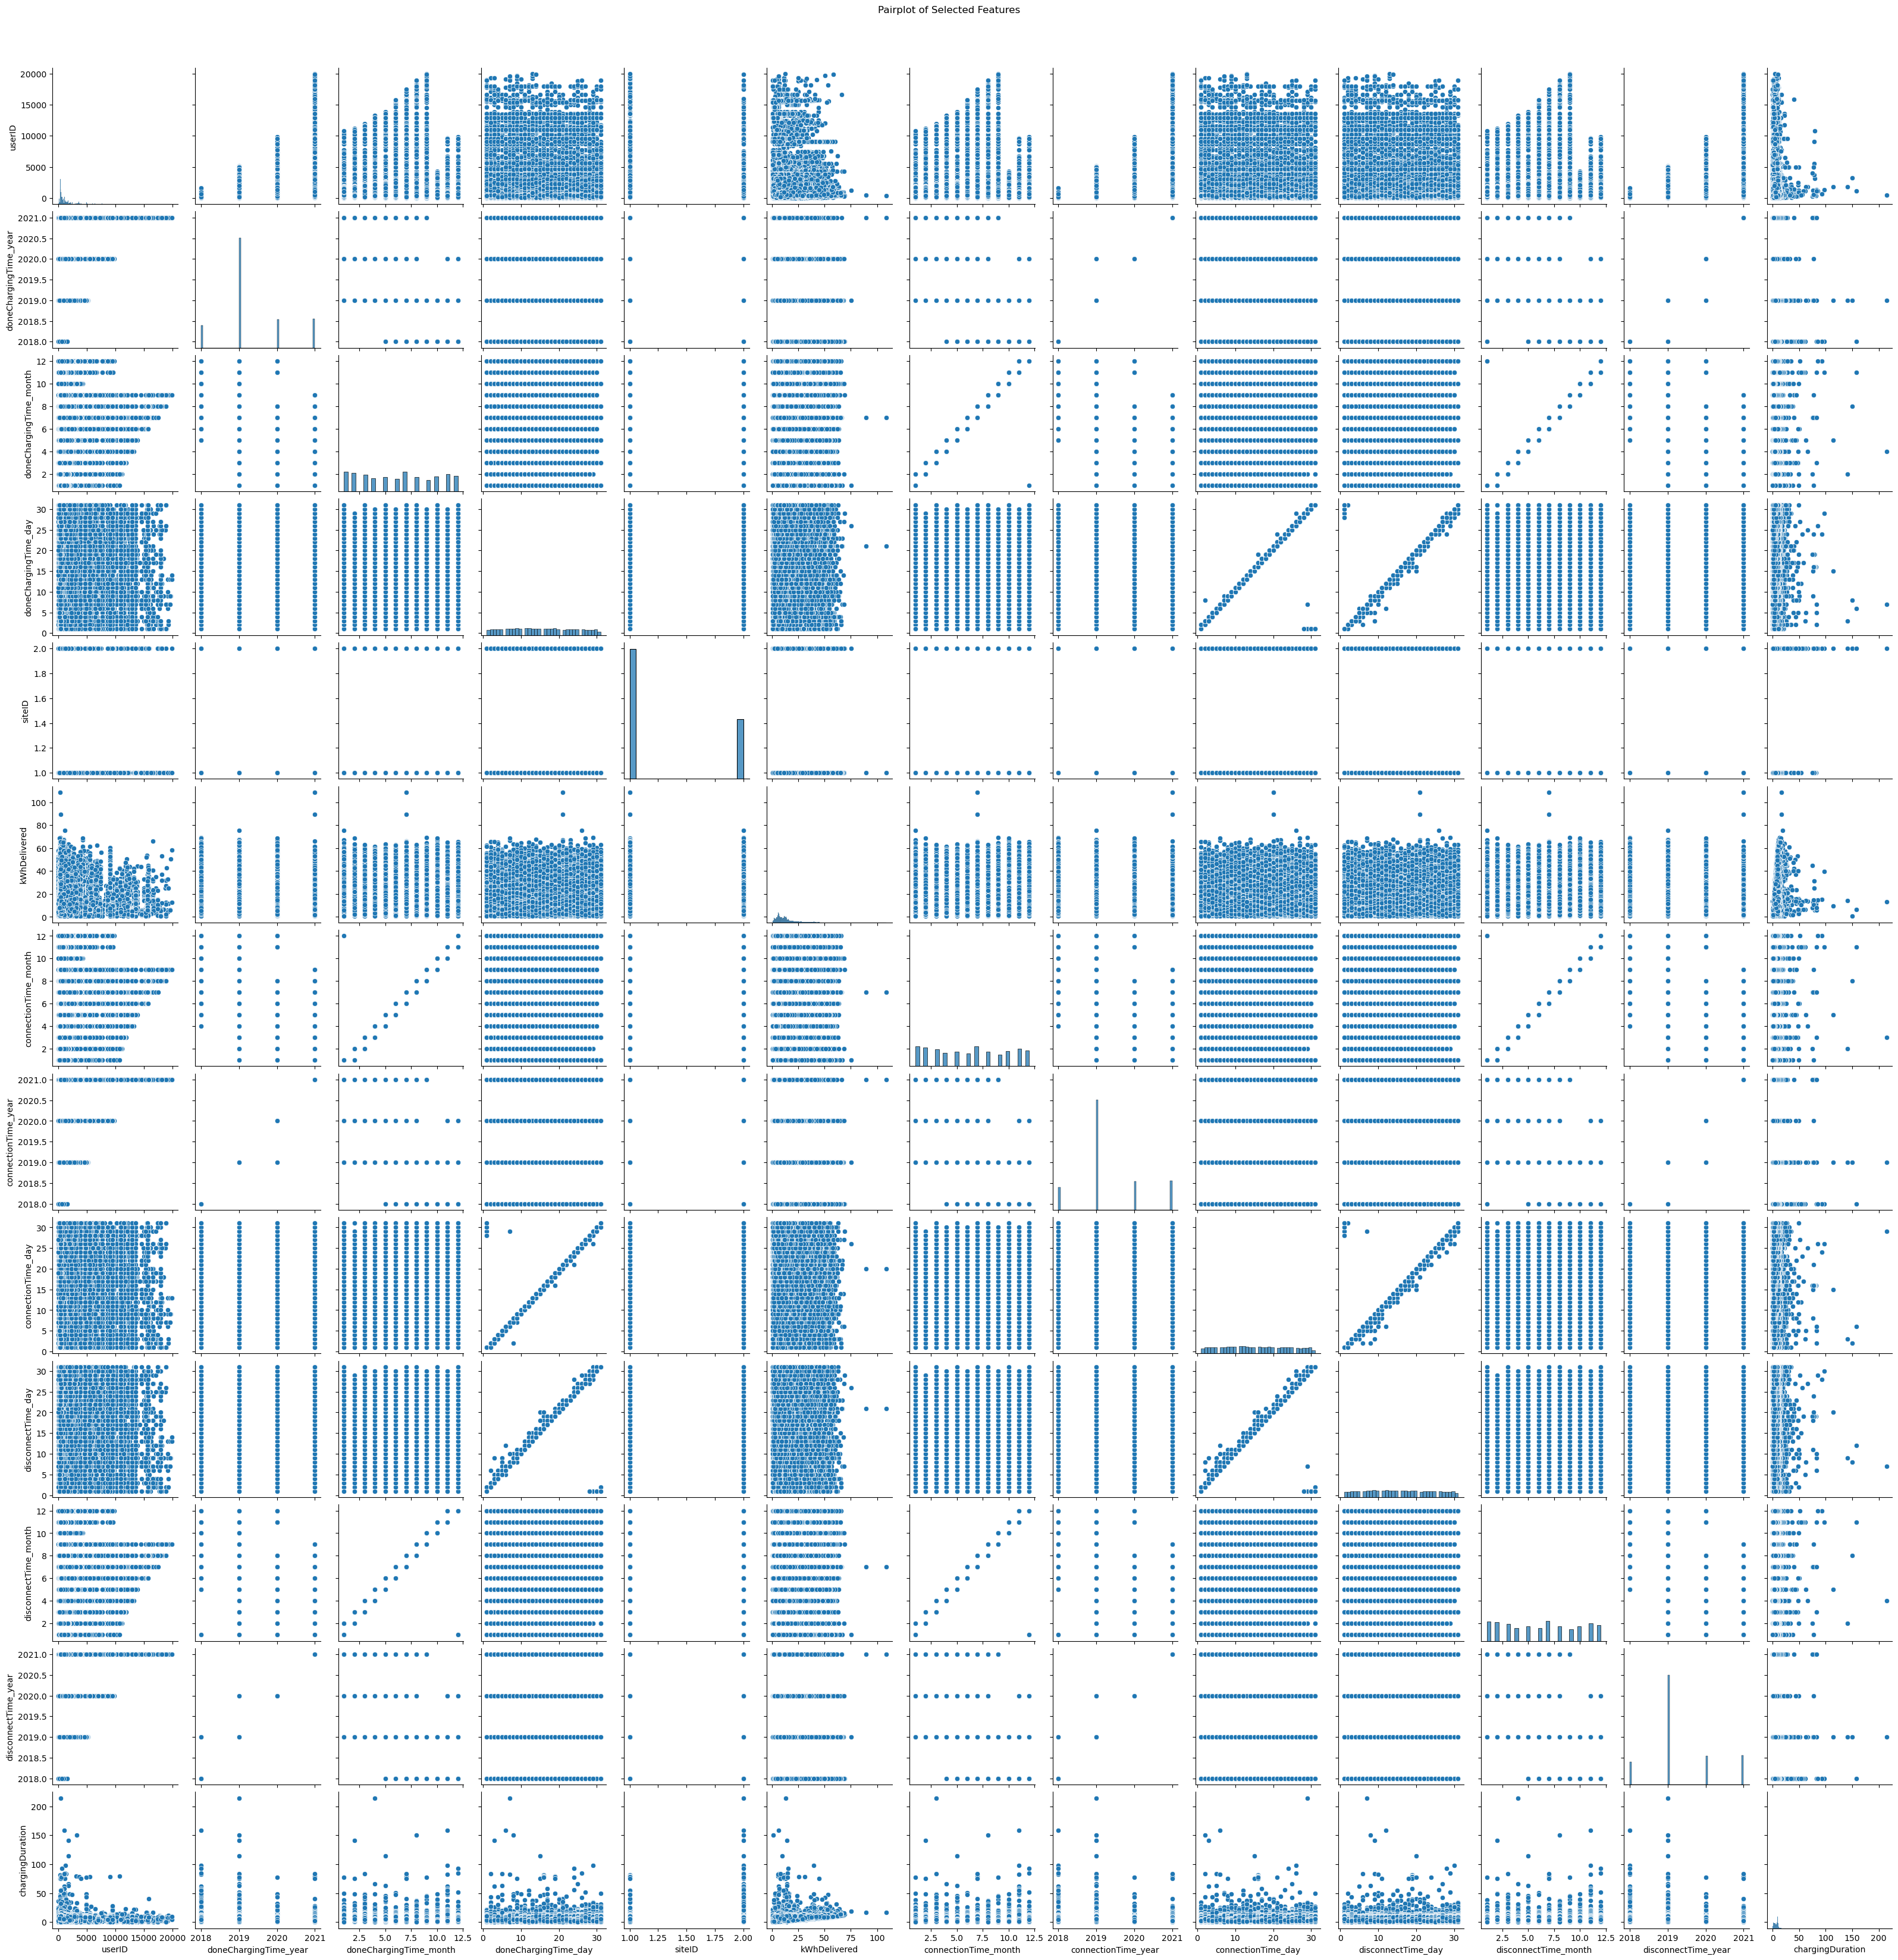

In [83]:
# Features für den Pairplot
ausgewählte_features = [
    'userID', 'doneChargingTime_date', 'doneChargingTime_year',
    'doneChargingTime_month', 'doneChargingTime_day', 'doneChargingTime_time',
    'id', 'stationID', 'timezone', 'siteID', 'spaceID',
    'kWhDelivered', 'disconnectTime_time', 'connectionTime_date', 'connectionTime_time',
    'connectionTime_month', 'connectionTime_year', 'disconnectTime_date',
    'connectionTime_day', 'disconnectTime_day', 'disconnectTime_month',
    'disconnectTime_year', 'chargingDuration'
]

# Entferne NaN-Werte für die ausgewählten Features
charging_set_cleaned = charging_set[ausgewählte_features].dropna()

# Pairplot erstellen
sns.pairplot(charging_set_cleaned)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

Index(['id', 'kWhDelivered', 'siteID', 'spaceID', 'stationID', 'timezone',
       'userID', 'connectionTime_date', 'connectionTime_time',
       'disconnectTime_date', 'disconnectTime_time', 'doneChargingTime_date',
       'doneChargingTime_time', 'connectionTime_year', 'connectionTime_month',
       'connectionTime_day', 'disconnectTime_year', 'disconnectTime_month',
       'disconnectTime_day', 'doneChargingTime_year', 'doneChargingTime_month',
       'doneChargingTime_day', 'chargingDuration', 'WhPerMile', 'kWhRequested',
       'milesRequested', 'minutesAvailable', 'modifiedAt', 'paymentRequired',
       'requestedDeparture', 'UserID', 'WhPerMile_present',
       'kWhRequested_present', 'milesRequested_present',
       'minutesAvailable_present', 'modifiedAt_present',
       'paymentRequired_present', 'requestedDeparture_present'],
      dtype='object')


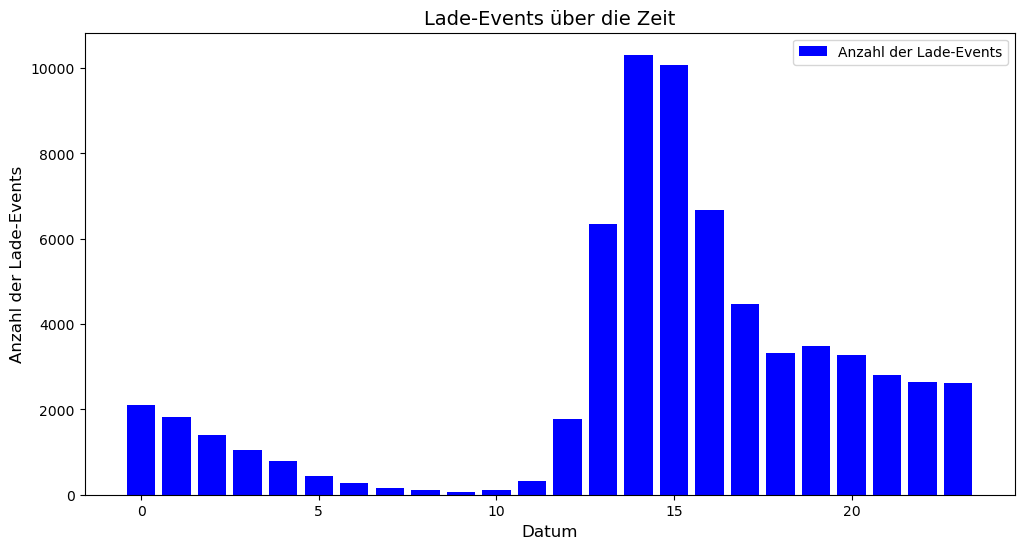

In [166]:
# Entferne NaN-Werte für die ausgewählten Features
#charging_set_cleaned = charging_set[ausgewählte_features].dropna()
print(charging_set.columns)
# Anzahl der Lade-Events pro Tag berechnen
charging_set['connectionTime_time'] = pd.to_datetime(charging_set['connectionTime_time'])
charging_set['hour'] = charging_set['connectionTime_time'].dt.hour


events_at_day = charging_set.groupby('hour').size().reset_index(name='count')


# Visualisierung der Lade-Events über die Zeit
plt.figure(figsize=(12, 6))
plt.bar(events_at_day['hour'], events_at_day['count'], color='blue', label='Anzahl der Lade-Events')
plt.title('Lade-Events über die Zeit', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Lade-Events', fontsize=12)
plt.grid(True, linestyle=' ', alpha=0.7)
plt.legend()
plt.show()


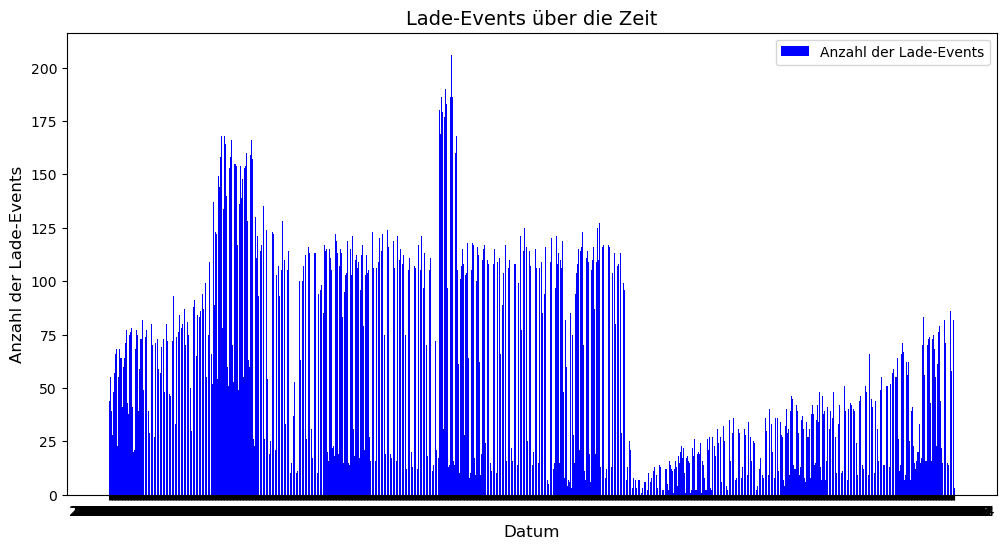

In [30]:
# Entferne NaN-Werte für die ausgewählten Features
#charging_set_cleaned = charging_set[ausgewählte_features].dropna()

# Anzahl der Lade-Events pro Tag berechnen
events_per_day = charging_set.groupby('connectionTime_date').size().reset_index(name='count')

# Visualisierung der Lade-Events über die Zeit
plt.figure(figsize=(12, 6))
plt.bar(events_per_day['connectionTime_date'], events_per_day['count'], color='blue', label='Anzahl der Lade-Events')
plt.title('Lade-Events über die Zeit', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Lade-Events', fontsize=12)
plt.grid(True, linestyle=' ', alpha=0.7)
plt.legend()
plt.show()



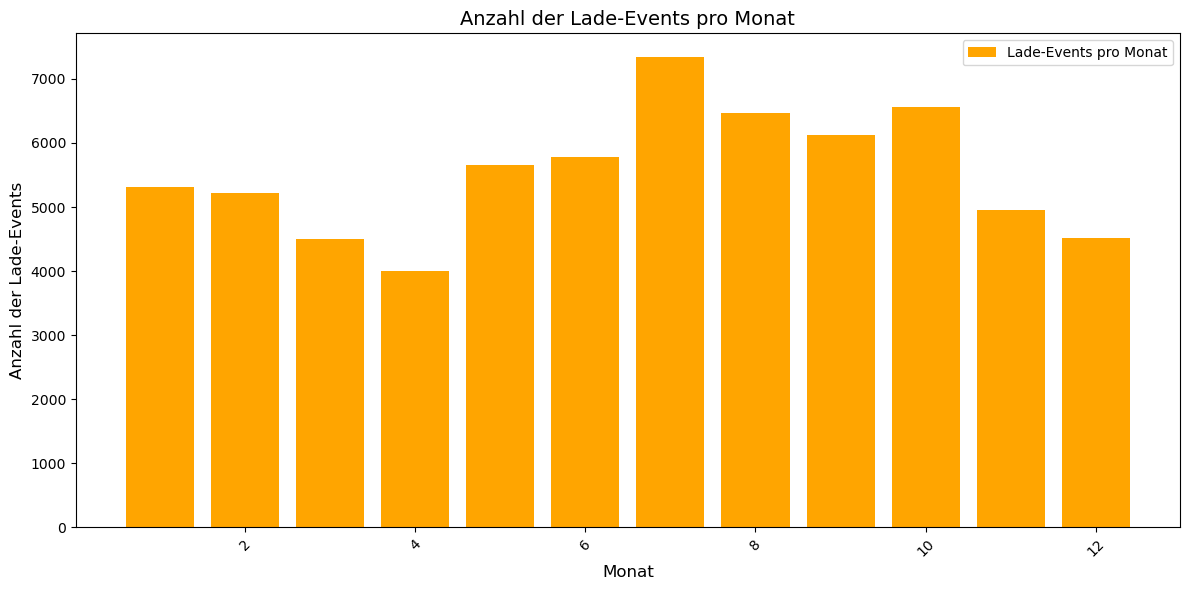

In [29]:
# Aggregation auf Monatsbasis
#events_per_month['connectionTime_date'] = events_per_month['connectionTime_date'].dt.to_timestamp()
events_per_month = charging_set.groupby('connectionTime_month').size().reset_index(name='count')

# Visualisierung als Balkendiagramm
plt.figure(figsize=(12, 6))
plt.bar(events_per_month['connectionTime_month'], events_per_month['count'], color='orange', label='Lade-Events pro Monat')
plt.title('Anzahl der Lade-Events pro Monat', fontsize=14)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Anzahl der Lade-Events', fontsize=12)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

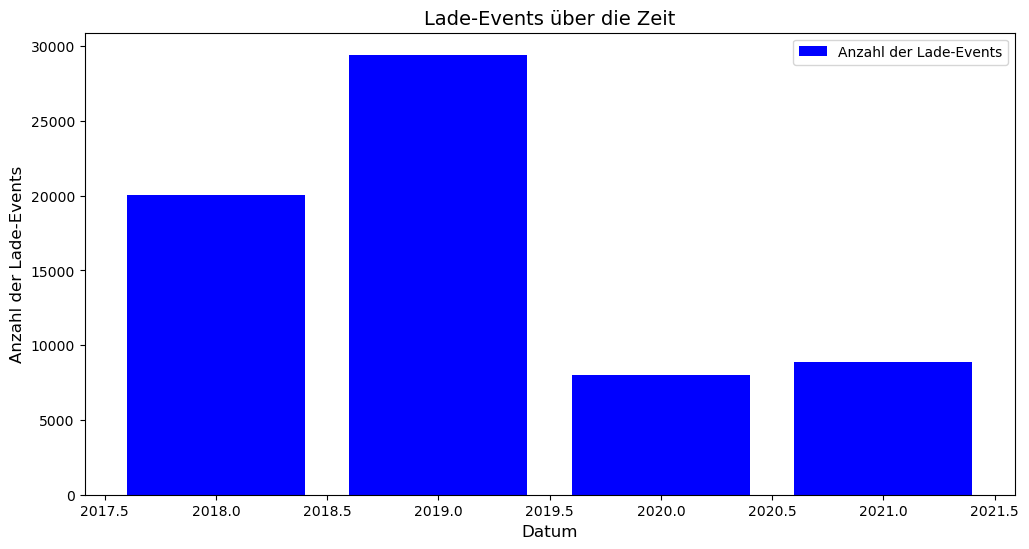

In [ ]:
events_per_year = charging_set.groupby('connectionTime_year').size().reset_index(name='count')

# Visualisierung der Lade-Events über die Zeit
plt.figure(figsize=(12, 6))
plt.bar(events_per_year['connectionTime_year'], events_per_year['count'], color='blue', label='Anzahl der Lade-Events')
plt.title('Lade-Events über die Zeit', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Lade-Events', fontsize=12)
plt.grid(True, linestyle=' ', alpha=0.7)
plt.legend()
plt.show()

In [4]:
# Features für die Heatmap
ausgewählte_features = [
    'userID', 'doneChargingTime_year',
    'doneChargingTime_month', 'doneChargingTime_day', 'id', 'stationID',
    'siteID', 'spaceID', 'kWhDelivered', 'connectionTime_month',
    'connectionTime_year', 'disconnectTime_month', 'disconnectTime_year', 'chargingDuration'
]

# Entferne NaN-Werte für die ausgewählten Features
charging_set_cleaned = charging_set[ausgewählte_features].dropna()

# Korrelationen berechnen
correlation_matrix = charging_set_cleaned.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

ValueError: could not convert string to float: '5e23b149f9af8b5fe4b973cf'